# Диаметр множества точек(вращающиеся калиперы)

В этом билете мы рассмотрим задачу о нахождении из множества точек $P$ двух самых удаленных друг от друга. Назовем это расстояние **диаметром**($d$) множества точек.

**Вращающиеся калиперы** – это несложный паттерн 
проектирования различных алгоритмов, требующих последовательного обхождения выпуклых многоугольников в $\mathbb{R}^2$. Рассмотрим применение метода на нашей задаче.

**Лемма 1.** *Диаметр множества лежит на выпуклой оболочке этого множества*

*Доказательство.* Докажем от противного.  
Пусть мы нашли диаметр множства $d(P)=dist(a,b)$, причем, не теряя общности, $b\not\in CH(P)$. Тогда утверждается, что можно пустить луч $ab$ и посмотреть, в какой точке он пересечет выпуклую оболочку. Легко показать, что как минимум одна точка, формирующая ребро выпуклой оболочки, пересеченное лучем, имеет дистанцию до $a$ больше $d(P)$. Ч.т.д.

Исходя из Леммы 1, диаметр можно искать только на выпуклой оболочке.

Давайте построим выпуклую оболочку для 30 случайных точек в двумерном пространстве.

In [2]:
import numpy as np #GLU
from scipy.spatial import ConvexHull
points = np.random.rand(20, 2)   # 30 случайных точек в двумерном пространстве
hull = ConvexHull(points)

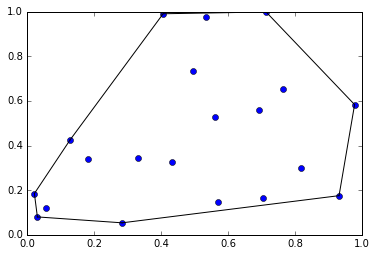

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
   plt.plot(points[simplex,0], points[simplex,1], 'k-')
plt.show()

**Переформулировка задачи.** Пусть $P = (p_1, p_2, ... ,p_n)$ — выпуклый многоугольник, в котором порядок обхода вершин направлен против часовой стрелки, и никакие три последовательные точки не лежат на одной прямой. Найти пару чисел $\langle i$, $j \rangle$, такие, что $d(p_i, p_j)$ максимально.

Прямая $L$ называется **опорной прямой** *(англ. line of support)* для многоугольника $P$, если его внутренность лежит по одну сторону от $L$, при этом $L$ проходит хотя бы через одну из вершин $P$.

**Теорема 1.** Пусть $L_1$ и $L_2$ — две параллельные опорные прямые (калиперы) фигуры $P$, расстояние между которыми имеет максимальное значение. $A_1$ и $A_2$ — граничные точки фигуры $P$, принадлежащие соответственно прямым $L_1$ и $L_2$. Тогда отрезок $A_1A_2$ перпендикулярен обеим прямым $L_1$ и $L_2$.

*Доказательство.* Докажем от противного.  
Пусть $A_1A_2$ не перпендикулярен обеим прямым $L_1$ и $L_2$. Тогда расстояние между прямыми $L_1$ и $L_2$ было бы меньше, чем отрезок $A_1A_2$, и тем более меньше, чем расстояние между двумя опорными прямыми $L'_1$ и $L'_2$ фигуры $P$, перпендикулярными к отрезку $A_1A_2$, что противоречит условию. Ч.т.д.


**Следствие 1.** Каждая из $L_1$ и $L_2$ содержит единственную граничную точку фигуры $P$.

*Доказательство.* Так как $A_1$ и $A_2$ — какие угодно граничные точки фигуры $P$, принадлежащие соответственно прямым $L_1$ и $L_2$, то из перпендикулярности отрезка $A_1A_2$ к прямым $L_1$ и $L_2$ следует, что ни одна из прямых $L_1$, $L_2$ не может иметь с фигурой $P$ целый общий отрезок.

**Теорема 2.** Диаметр выпуклого многоугольника равен максимальному расстоянию между параллельными опорными прямыми.

*Доказательство.* Пусть $P$ — выпуклая фигура, $L_1$ и $L_2$ — параллельные опорные прямые, расстояние между которыми имеет наибольшее возможное значение $d$, $A_1$ и $A_2$ — общие точки фигуры $P$ и прямых $L_1$ и $L_2$ соответственно. По предыдущей теореме $A_1A_2$ перпендикулярен к прямым $L_1$, $L_2$, следовательно, его длина равна $d$. Докажем, что расстояние между любыми двумя точками фигуры $P$ не преводходит $d$. Действительно, если $B$ и $C$ — какие-либо две точки фигуры $P$, а $m$ и $n$ — опорные прямые, перпендикулярные к отрезку $BC$, то отрезок $BC$ не превосходит расстояния между прямыми $m$ и $n$, которое в свою очередь не превосходит $d$. Следовательно, длина $BC$ не может быть больше $d$. Ч.т.д.

Точки, через которые можно провести параллельные опорные прямые, будем называть **противолежащими** *(англ. antipodal)*.

Заметим, что параллельные опорные прямые можно провести не через любую пару точек. 

### Алгоритм

Для начала найдем минимальную и максимальную точку среди точек выпуклой оболочки (лексикографически) $A$ и $B$. Создадим две вертикальных параллельных прямых, проходящих через соответствующие точки – $l_1$, $l_2$.Будем заворачивать калиперы по часовой стрелке, поэтому условимся, что $l_1$ смотрит вверх, а $l_2$ вниз. Добавим текущие точки, на которых стоят параллельные прямые, в список ребер ответа ($⟨A,B⟩$). Сравним угол между $l_1$ и $AC$ с углом между $l_2$ и $BD$. Выберем меньший и перейдем к следующей точке относительно выбранной, повернув при этом соответствующую прямую на величину углу, так, чтобы прямая теперь совпадала с $AC$. Будем всегда поддерживать параллельность калиперов (прямых), поэтому вторую прямую тоже мысленно повернем. Получим две новые прямые $l_3$, $l_4$. Перейдем в начало процесса, добавив $⟨C, B⟩$ в список ребер ответа. Когда алгоритм придет в начальное положение, на выходе получим список ребер, среди которых будет искомое. Переберем их за линию и найдем максимальное (можно делать это in-place во время алгоритма, формируя один большой fold).
В реализации углы сравниваются поворотами, и функция хранит только одно доминирующее ребро, на котором калипер "лежит" полностью, а второй калипер параллелен первому и соответствует некоторой точке. Исключение составляет первый шаг, на котором калиперы могут лежать исключительно на точках – можно добавить фиктивное ребро с координатами $(x,y+1)$ относительно минимальной или максимальной точки.

### Корректность алгоритма

*Доказательство.* Докажем от противного.  
Пусть среди всех пар точек, формирующих ребра, нет нужной. Отметим, что метод выдает все ребра, для которых верно, что сущетствует пара параллельных прямых, не пересекающих многоугольник, проходящих через эти точки. Очевидно, что если для двух точек такие прямые не построить, то и диаметр на них лежать не может – легко показать, что взяв соседнюю, мы увеличим расстояние между ними (следует из непараллельности, надо аккуратно по- смотреть углы).
Отсюда диаметр лежит в классе пар точек, на которых прямые строятся. Поскольку алгоритм просматривает все такие (несложно показать), то диаметр будет лежать среди ребер ответа.

### Асимптотика

Представленный выше алгоритм генерирует все пары противолежащих точек в многоугольнике P, состоящем из N вершин, за время O(N).

*Доказательство*  Мы хранили указатели на противолежащие вершины, и на каждой итерации алгоритма увеличивали либо один из данных указателей, либо сразу оба (когда обе прямые проходяли через сторону многоугольника), и заканчивали работу, когда опорные прямые сделали полный круг. Таким образом, каждая из вершин була посещена каждой из прямых не более двух раз.

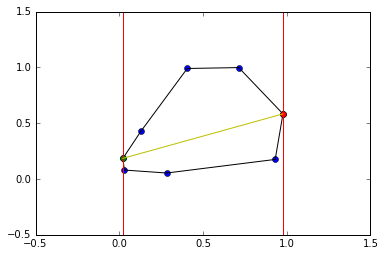

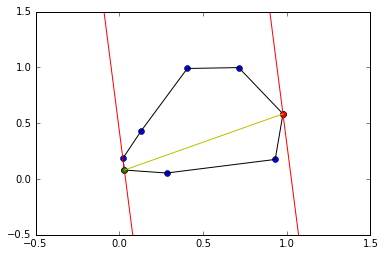

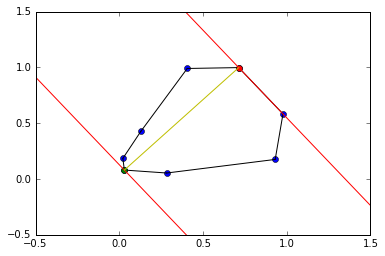

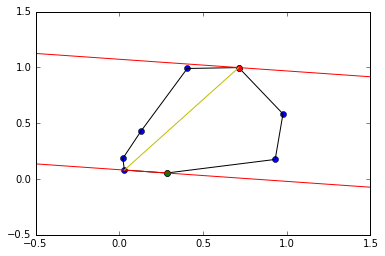

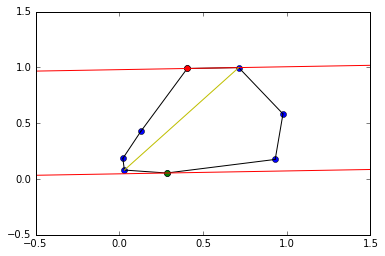

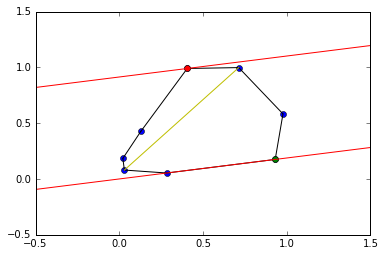

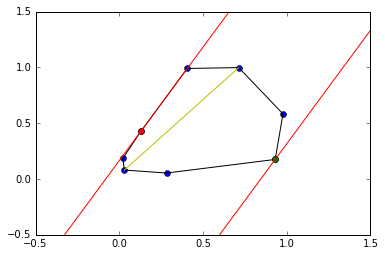

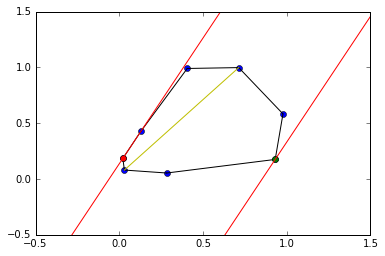

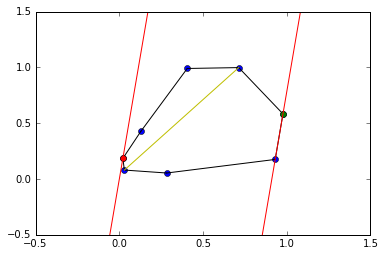

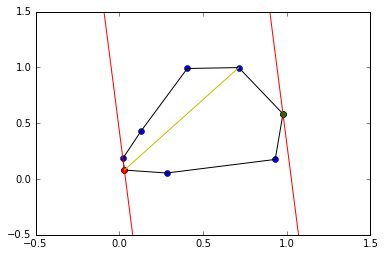

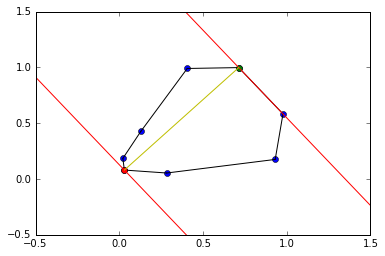

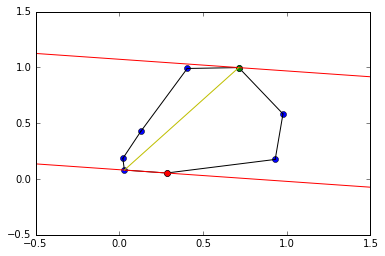

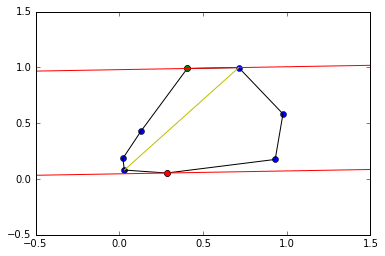

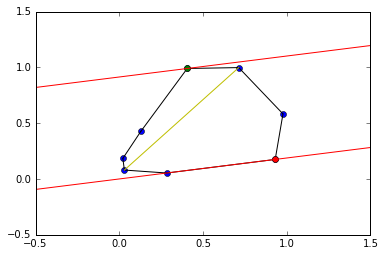

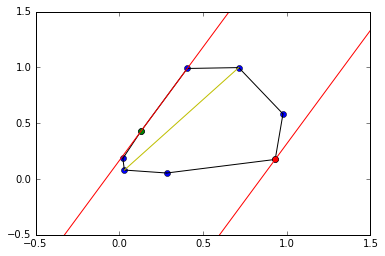

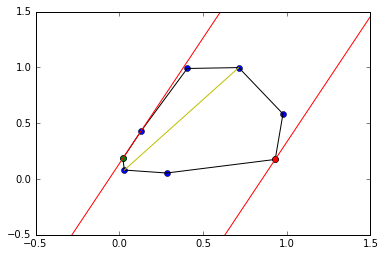

In [4]:
hpoints = points[hull.vertices]
n = len(hpoints)

def draw(A, B, dir, best):
    plt.plot(hpoints[:,0], hpoints[:,1], 'o')    
    for simplex in hull.simplices:
        plt.plot(points[simplex,0], points[simplex,1], 'k-')
    plt.plot(hpoints[A][0], hpoints[A][1], 'go')
    plt.plot(hpoints[B][0], hpoints[B][1], 'ro')
    
    axes = plt.axis()
    plt.xlim( [axes[0], axes[1]])
    plt.ylim( [axes[2], axes[3]])    
    plt.plot([hpoints[A][0] - dir[0] * 100, hpoints[A][0] + dir[0] * 100], [hpoints[A][1] - dir[1] * 100, hpoints[A][1] + dir[1] * 100], 'r')
    plt.plot([hpoints[B][0] - dir[0] * 100, hpoints[B][0] + dir[0] * 100], [hpoints[B][1] - dir[1] * 100, hpoints[B][1] + dir[1] * 100], 'r')

    plt.plot([hpoints[best[0]][0], hpoints[best[1]][0]], [hpoints[best[0]][1], hpoints[best[1]][1]], 'y')
    
    
    plt.xlim( [axes[0] - 0.5, axes[1] +0.5])
    plt.ylim( [axes[2] - 0.5, axes[3] +0.5])    
    
    
    plt.show()

def vecmul(x1, y1, x2, y2):
    return x1 * y2 - x2 * y1

def dist(a, b):
    return (hpoints[a][0] - hpoints[b][0])**2 + (hpoints[a][1] - hpoints[b][1])**2;
    
A = 0
B = 0
for i in range(1, n):
    if (hpoints[i][0] < hpoints[A][0]):
        A = i
    if (hpoints[i][0] > hpoints[B][0]):
        B = i
dir = [0, 1]    

best = [A, B]

draw(A, B, dir, best)



for i in range(0, n):
    nextA = (A + 1) % n;
    vA = [hpoints[nextA][0] - hpoints[A][0], hpoints[nextA][1] - hpoints[A][1]]
    
    nextB = (B + 1) % n;
    vB = [hpoints[nextB][0] - hpoints[B][0], hpoints[nextB][1] - hpoints[B][1]]
    
    while (vecmul(vA[0], vA[1], -vB[0], -vB[1]) < 0):
        dir = vB
        B = (B + 1) % n;
        if (dist(A, B) > dist(best[0], best[1])):
            best = [A, B]
        draw(A, B, dir, best)
        nextB = (B + 1) % n;
        vB = [hpoints[nextB][0] - hpoints[B][0], hpoints[nextB][1] - hpoints[B][1]]
    dir = vA
    A = (A + 1) % n
    if (dist(A, B) > dist(best[0], best[1])):
        best = [A, B]
    draw(A, B, dir, best)
    

In [5]:
print(dist(best[0],best[1]))

1.30977685345
